In [1]:
#plot_stimulus_detection

# Data : 쥐에 일정한 자극을 주며 쥐의 뇌파를 측정
# Goal : 측정된 뇌파데이터를 분석하여 자극 시점을 찾아낸다. 

# 프로세스 : peak를 찾고 -> peak 사이에서 나타나는 값의 차이를 계산한다 -> peak 사이에서 일정수준 이상의 차이가 나는 값들을 찾아낸다

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, peak_prominences, savgol_filter

In [2]:
#load data
cols=[0,27,28,29]
labels=['time','ch27','ch28','ch29']
bdata = pd.read_csv("realdata.csv",usecols=cols, names=labels, header=None)
bdata.shape

(92520, 4)

In [3]:
#select data
x = bdata['time']    
y1 = bdata['ch28']

In [4]:
#필터적용
#smoothed signal using savgol_filter
#y1 = savgol_filter(y1, 51, 3)

In [5]:
#peak를 찾아 peak위치를 np배열 형태로 반환
def find_peak(signal, dist):
    pos_peaks, _ = find_peaks(signal, distance=dist)
    neg_peaks, _ = find_peaks(signal*-1, distance=dist)
    peaks = np.sort(np.concatenate((pos_peaks, neg_peaks)))
    return peaks

In [6]:
# 이웃한 peak끼리의 차이를 np배열로 반환
def find_peak_diff(signal,peaks): 
    peaks_val = signal[peaks]
    peaks_val_diff = -np.absolute(np.diff(peaks_val))
    return peaks_val_diff

In [7]:
#이웃한 peak들의 차이가 v이상인 index를 찾고 index에 해당하는 peak의 위치들을 반환
def peak_diff_condition_index(signal,peaks,v):
    peaks_val_diff = find_peak_diff(signal, peaks)
    index = [idx for idx,val in enumerate(peaks_val_diff) if val <= -v]
    print(index)
    result = peaks[index]
    return result

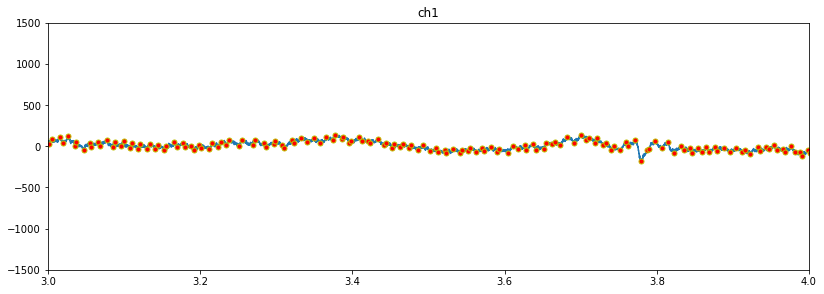

In [15]:
#plot signal with peak
def plot_peak(time, signal, dist):
    peaks = find_peak(signal, dist)
    
    fig = plt.figure(figsize=(30,10))
    ax_ch1 = fig.add_subplot(2,2,1)
    ax_ch1.set(xlim=[3,4], ylim=[-1500,1500], title='ch1')
    ax_ch1.plot(time,signal)
    
    ax_ch1.plot(time[peaks],signal[peaks],"y1",marker="o",ms=5,mfc="r")
    plt.show()

plot_peak(x,y1,50)

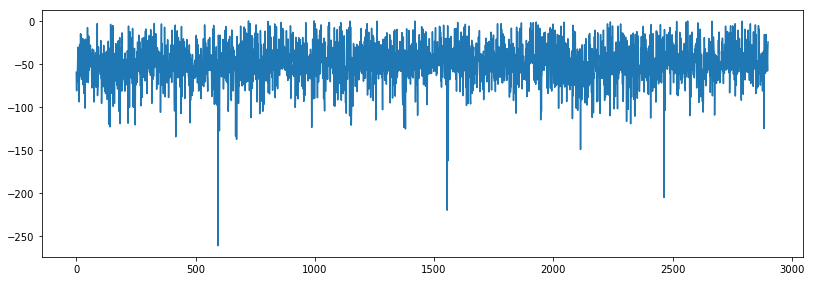

In [16]:
#peak끼리의 차이를 visualize 해준다
def plot_peak_diff(signal,peaks):
    peaks_val_diff = find_peak_diff(signal, peaks)
    fig = plt.figure(figsize=(30,10))
    ax_ch1 = fig.add_subplot(2,2,1)
    ax_ch1.plot(peaks_val_diff)
    plt.show()

peaks= find_peak(y1,50)
plot_peak_diff(y1,peaks)

In [17]:
#피크차이가 v 이상인 (자극으로판단되는) 지점을 plot 해준다
#plot signal with stimulus dectection
#dist: 50 = 10ms
def plot_stimulus_detection(time,signal,dist,v):
    fig = plt.figure(figsize=(30,10))
    
    ax_ch1 = fig.add_subplot(2,2,1)
    ax_ch1.set(xlim=[3,5], ylim=[-1500,1500], title='ch1')
    ax_ch1.plot(time,signal)
    
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    print(stimulus)
    ax_ch1.plot(time[stimulus],signal[stimulus],"y1",marker="o",ms=10,mfc="r")
    plt.show()

In [18]:
#개선된 버전
#plot signal with stimulus dectection
#dist: 50 = 10ms


def plot_stimulus_detection2(ax,time,signal,dist,v):
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    line = ax.plot(time[stimulus],signal[stimulus],"y1",marker="o",ms=10,mfc="r")
    return line

[594, 1555, 2464]


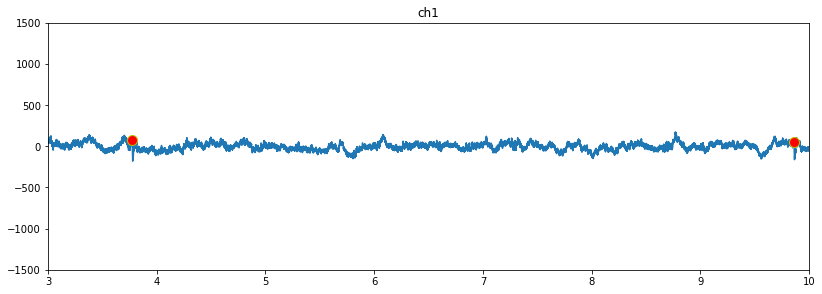

In [20]:
fig = plt.figure(figsize=(30,10))
    
ax_ch1 = fig.add_subplot(2,2,1)
ax_ch1.plot(x,y1)

ax_ch1.set(xlim=[3,10], ylim=[-1500,1500], title='ch1')
plot_stimulus_detection2(ax_ch1,x,y1,50,180)
plt.show()

[594, 1555, 2464]
[18856 49294 78579]


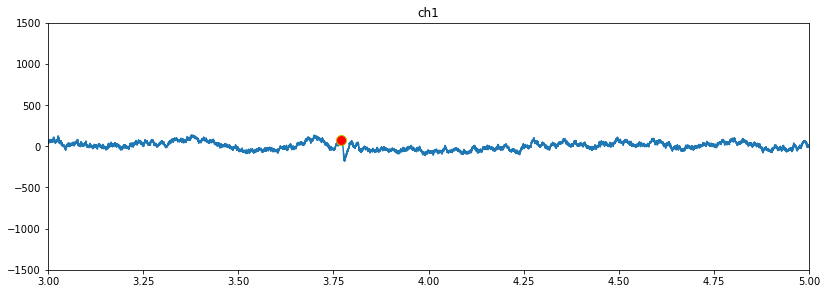

In [21]:
plot_stimulus_detection(x,y1,50,180)

In [24]:
def plot_stimulus_heatmap(ax,signal,dist,v):
    peaks = find_peak(signal, dist)
    stimulus = peak_diff_condition_index(signal,peaks,v)
    stimulus_count = stimulus.size
    
    x_labels = []
    y_labels = []
    data = np.array([[2,1,0],[0,2,0],[1,3,5]])
    
    # Plot the heatmap
    im = ax.imshow(data,cmap="Blues",)
    
    # Create colorbar
    cbar = fig.colorbar(im)
    
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    return im, cbar
    

plot_stimulus_heatmap(ax_ch1,y1,50,180)

[594, 1555, 2464]


(<matplotlib.image.AxesImage at 0x1c23cf9190>,
 <matplotlib.colorbar.Colorbar at 0x1c24e9b050>)